## FARS 2010 through 2015 Vehicle Table

data source:  ftp://ftp.nhtsa.dot.gov/

Fatality Analysis Reporting System (FARS) Analytical User's Manual 1975-2015

data manual:  https://crashstats.nhtsa.dot.gov/#/

In [1]:
import numpy as np
import pandas as pd
import glob
from os import path
print('numpy', np.__version__)
print('pandas', pd.__version__)

numpy 1.11.1
pandas 0.18.1


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import __version__ as matplotlib_version

%matplotlib inline
sns.set(color_codes=True)
print(sns.__version__)
print(matplotlib_version)

0.7.1
1.5.1


In [23]:
# Load FARS Vehicle tables
# 2011, 2012 has a number of values does not match index
# Downloaded again and unzipped, but not resolved
veh_15_df = pd.read_sas('FARS/2015/vehicle.sas7bdat')
veh_14_df = pd.read_sas('FARS/2014/vehicle.sas7bdat')
veh_13_df = pd.read_sas('FARS/2013/vehicle.sas7bdat')
#veh_12_df = pd.read_sas('FARS/2012/vehicle.sas7bdat')
#veh_11_df = pd.read_sas('FARS/2011/vehicle.sas7bdat')
veh_10_df = pd.read_sas('FARS/2010/vehicle.sas7bdat')

print(veh_15_df.shape)
print(veh_14_df.shape)
print(veh_13_df.shape)
#print(veh_12_df.shape)
#print(veh_11_df.shape)
print(veh_10_df.shape)

veh_15_df['YEAR'] = [2015] * veh_15_df.shape[0]
veh_14_df['YEAR'] = [2014] * veh_14_df.shape[0]
veh_13_df['YEAR'] = [2013] * veh_13_df.shape[0]
#veh_12_df['YEAR'] = [2012] * veh_12_df.shape(0)
#veh_11_df['YEAR'] = [2011] * veh_12_df.shape(0)
veh_10_df['YEAR'] = [2010] * veh_10_df.shape[0]

veh_15_df.head(3)

(48923, 102)
(44950, 102)
(45102, 102)
(44862, 116)


,STATE,ST_CASE,VEH_NO,VE_FORMS,NUMOCCS,DAY,MONTH,HOUR,MINUTE,HARM_EV,...,VTCONT_F,P_CRASH1,P_CRASH2,P_CRASH3,PCRASH4,PCRASH5,ACC_TYPE,DEATHS,DR_DRINK,YEAR
0,1.0,10001.0,1.0,1.0,1.0,1.0,1.0,2.0,40.0,35.0,...,0.0,14.0,13.0,99.0,1.0,4.0,1.0,1.0,1.0,2015
1,1.0,10002.0,1.0,1.0,1.0,1.0,1.0,22.0,13.0,34.0,...,0.0,14.0,6.0,1.0,4.0,4.0,7.0,1.0,0.0,2015
2,1.0,10003.0,1.0,1.0,2.0,1.0,1.0,1.0,25.0,42.0,...,0.0,1.0,13.0,1.0,1.0,4.0,1.0,1.0,1.0,2015


In [24]:
veh_10to15_df = pd.concat([veh_15_df,
                           veh_14_df,
                           veh_13_df])
print(veh_10to15_df.shape)

(138975, 103)


In [25]:
veh_10to15_df.columns

Index(['STATE', 'ST_CASE', 'VEH_NO', 'VE_FORMS', 'NUMOCCS', 'DAY', 'MONTH',
       'HOUR', 'MINUTE', 'HARM_EV',
       ...
       'VTCONT_F', 'P_CRASH1', 'P_CRASH2', 'P_CRASH3', 'PCRASH4', 'PCRASH5',
       'ACC_TYPE', 'DEATHS', 'DR_DRINK', 'YEAR'],
      dtype='object', length=103)

In [26]:
veh_10to15_df['TRAV_SP'] = veh_10to15_df.TRAV_SP.astype(int)
veh_10to15_df['TRAV_SP'].value_counts().sort_values(ascending=False).head(10)

998    71349
999    13553
55      6875
0       5757
45      5141
65      3363
50      3300
40      2954
60      2880
35      2780
Name: TRAV_SP, dtype: int64

In [31]:
# Exclude the coded values unreported 998,unknown 999 so 
# that they do not effect the quartiles in the box plot
# Note that the there 

vel_yr_list = [v
               for v,y in zip(veh_10to15_df.TRAV_SP, veh_10to15_df.YEAR)
               if v < 152 ]
veh_10to15_df_trav_sp = pd.DataFrame({'TRAV_SP_NOCODE': [v
               for v,y in zip(veh_10to15_df.TRAV_SP, veh_10to15_df.YEAR)
               if v < 152 ],
                                      'YEAR': [y
               for v,y in zip(veh_10to15_df.TRAV_SP, veh_10to15_df.YEAR)
               if v < 152 ]
    })

In [32]:
# Get a sorted set of values so that I can rotate the labels on the plot
labels_trav_sp = set(veh_10to15_df_trav_sp.TRAV_SP_NOCODE.sort_values())

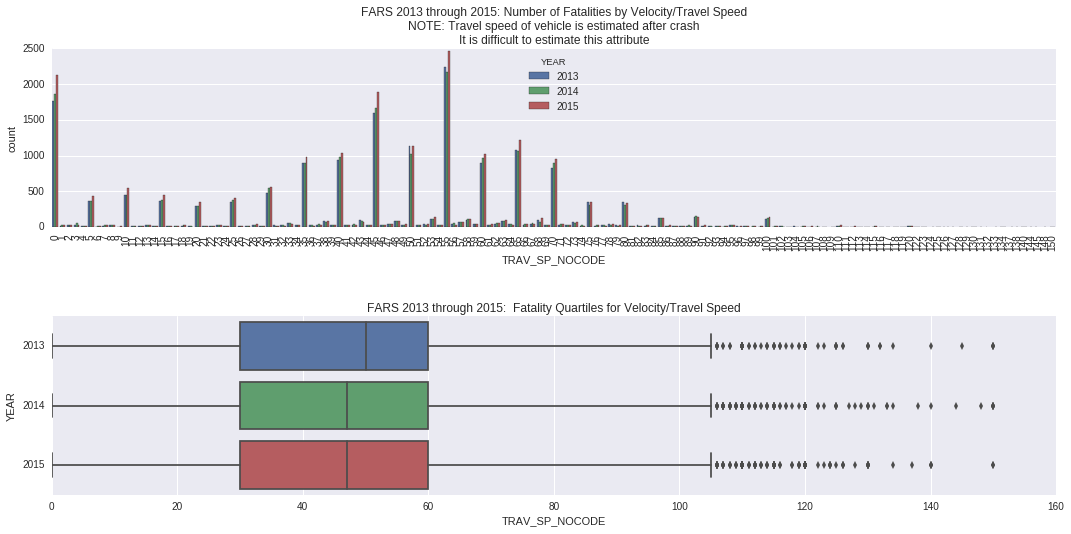

In [37]:
fig = plt.figure(figsize=(18, 8))
fig.subplots_adjust(hspace=.5)

ax1 = fig.add_subplot(211)
sns.countplot( x='TRAV_SP_NOCODE',
               hue='YEAR',
               data=veh_10to15_df_trav_sp,
               ax=ax1)

ax1.set_xticklabels(labels_trav_sp, rotation=90)
title1 = 'FARS 2013 through 2015: Number of Fatalities by Velocity/Travel Speed\n'
title1 += 'NOTE: Travel speed of vehicle is estimated after crash\n'
title1 += 'It is difficult to estimate this attribute'
ax1.set_title(title1)

ax2 = fig.add_subplot(212)
sns.boxplot( x='TRAV_SP_NOCODE',
             y='YEAR',
             data=veh_10to15_df_trav_sp,
             orient="h",
             ax=ax2)
ax2.set_xlim([0,160])
ax2.set_title('FARS 2013 through 2015:  Fatality Quartiles for Velocity/Travel Speed')

In [39]:
# Vehicle table, Roadway Alignment VALIGN, page 185/592
#
# 1st column, encodings for 2010-2012
# 2nd column, encodings for 2013-Later
#
# 0 - Non-Trafficway Area
# - 0 Non-Trafficway or Driveway Access
# 1 1 Straight
# 2 2 Curve Right
# 3 3 Curve Left
# 4 4 Curve – Unknown Direction
# 8 8 Not Reported
# 9 9  Unknown

veh_10to15_df['VALIGN'] = veh_10to15_df.VALIGN.astype(int)
veh_10to15_df['VALIGN'].value_counts().sort_values(ascending=False).head(10)

1    106716
3     14637
2     11978
8      2261
4      2168
0       882
9       333
Name: VALIGN, dtype: int64

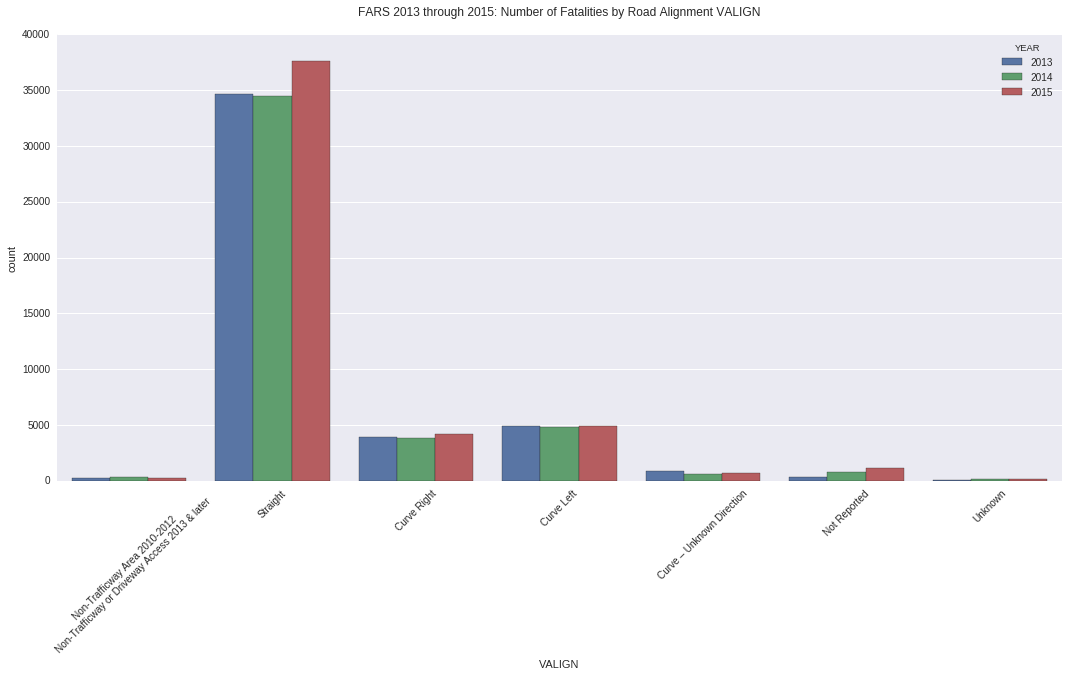

In [40]:
# Vehicle table, Roadway Alignment VALIGN, page 185/592
order_valign = [0,1,2,3,4,8,9]
non_traffic = 'Non-Trafficway Area 2010-2012\n'
non_traffic += 'Non-Trafficway or Driveway Access 2013 & later'
labels_valign = [  non_traffic,
                  'Straight',
                  'Curve Right',
                  'Curve Left',
                  'Curve – Unknown Direction',
                  'Not Reported',
                  'Unknown']

fig_valign = plt.figure(figsize=(18, 8))

ax1_valign = fig_valign.add_subplot(111)
sns.countplot( x='VALIGN',
               hue='YEAR',
               data=veh_10to15_df,
               order=order_valign,
               ax=ax1_valign)

title1 = 'FARS 2013 through 2015: Number of Fatalities by Road Alignment VALIGN\n'
ax1_valign.set_title(title1)
ax1_valign.set_xticklabels(labels_valign, rotation=45)

In [41]:
veh_10to15_df['SPEEDREL'] = veh_10to15_df.SPEEDREL.astype(int)
veh_10to15_df['SPEEDREL'].value_counts().sort_values(ascending=False)

0    105762
4     12073
3     10414
9      6325
5      3394
8       755
2       252
Name: SPEEDREL, dtype: int64

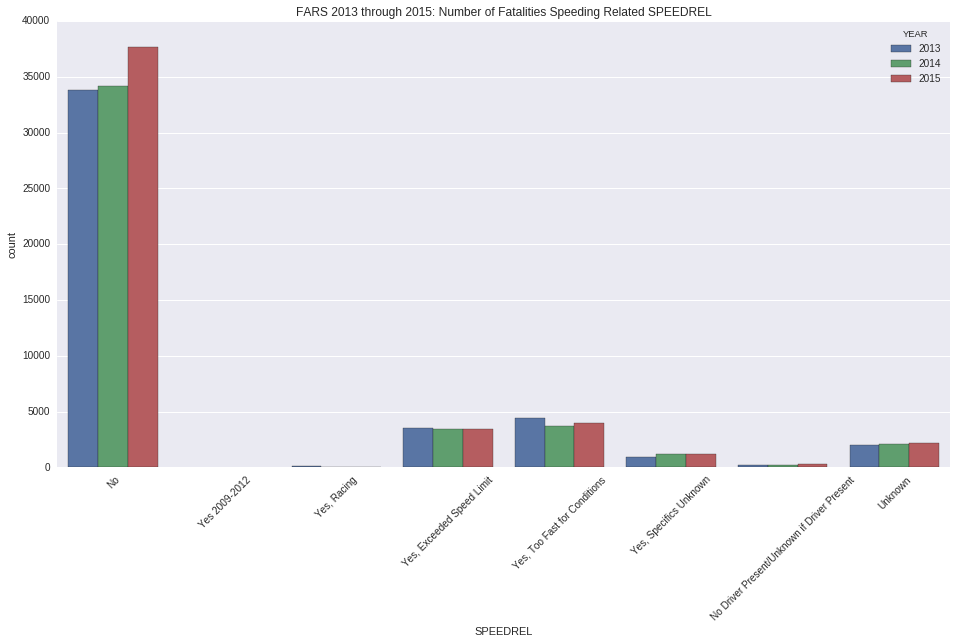

In [42]:
labels_speedrel = [ 'No',
                    'Yes 2009-2012',
                    'Yes, Racing',
                    'Yes, Exceeded Speed Limit',
                    'Yes, Too Fast for Conditions',
                    'Yes, Specifics Unknown',
                    'No Driver Present/Unknown if Driver Present',
                    'Unknown']
order_speedrel = [0,1,2,3,4,5,8,9]

fig = plt.figure(figsize=(16, 8))

ax1_speedrel = fig.add_subplot(111)
sns.countplot( x='SPEEDREL',
               hue='YEAR',
               data=veh_10to15_df,
               order=order_speedrel,
               ax=ax1_speedrel)

title = 'FARS 2013 through 2015: Number of Fatalities Speeding Related SPEEDREL'
ax1_speedrel.set_title(title)
ax1_speedrel.set_xticklabels(labels_speedrel, rotation=45)

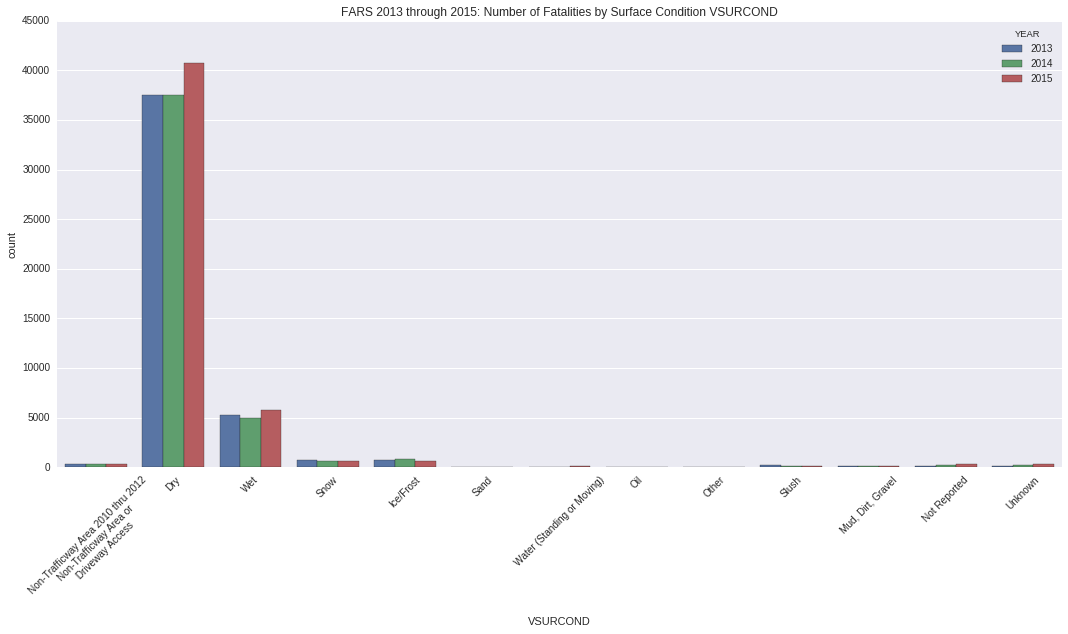

In [48]:
# Roadway Surface Condition VSURCOND
# page 188 of 592

order_surface_condition = [ 0,1,2,3,4,5,6,7,8,10,11,98,99]

non_trafficway_area = 'Non-Trafficway Area 2010 thru 2012\n'
non_trafficway_area += 'Non-Trafficway Area or\n Driveway Access'
labels_surface_condition = [ non_trafficway_area,
                            'Dry',
                            'Wet',
                            'Snow',
                            'Ice/Frost',
                            'Sand',
                            'Water (Standing or Moving)',
                            'Oil',
                            'Other',
                            'Slush',
                            "Mud, Dirt, Gravel",
                            'Not Reported',
                            'Unknown']

fig = plt.figure(figsize=(18, 8))

ax1_surface_condition = fig.add_subplot(111)
sns.countplot( x='VSURCOND',
               hue='YEAR',
               data=veh_10to15_df,
               order=order_surface_condition,
               ax=ax1_surface_condition)

title = 'FARS 2013 through 2015: Number of Fatalities by Surface Condition VSURCOND'
ax1_surface_condition.set_title(title)
ax1_surface_condition.set_xticklabels(labels_surface_condition, rotation=45)